In [1]:
from convDiff_model import convDiff
from makeDataset import SampleDataset

import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

# Load model:
net = convDiff()
net.load_state_dict(
    torch.load('./ConvDiff.pth', 
               map_location=torch.device('cpu'))
)


<All keys matched successfully>

In [2]:
dataset = SampleDataset()
loader = DataLoader(dataset,batch_size=1, shuffle=True, num_workers=2)
dataiter = iter(loader)


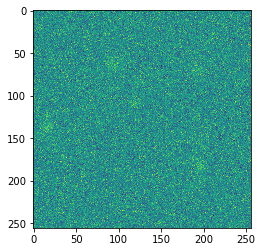

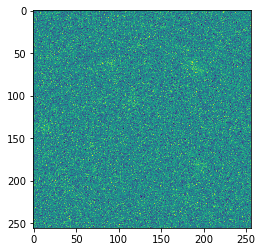

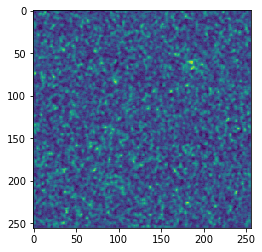

In [3]:
input = dataiter.next()[0]
plt.imshow(input[0,0,:,:])
plt.show()
plt.imshow(input[0,1,:,:])
plt.show()
with torch.no_grad():
    output = net(input.float())
plt.imshow(output[0,0,:,:])
plt.show()